<a href="https://colab.research.google.com/github/vikashnitk/Stock-price-prediction/blob/master/Stock_price_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install yfinance


  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=363524f8e7838e54167a8d414bf17bbef96967b090f0b00eb3e40d42cc51cda0
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [3]:
# Import the plotting library 
import matplotlib.pyplot as plt 
 
# Import the yfinance. If you get module not found error the run !pip install yfiannce from your Jupyter notebook 
import yfinance as yf   
 
# Get the data of the stock AAPL 
data = yf.download(tickers="INFY.NS", 
 start="1996-01-01",  end="2018-12-31") #year-mon-day
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,0.794920,0.796680,0.791020,0.796680,-0.000441,204800
1996-01-02,0.794920,0.798830,0.793460,0.793460,-0.000439,204800
1996-01-03,0.798830,0.798830,0.798830,0.798830,-0.000442,102400
1996-01-04,0.791020,0.794920,0.791020,0.793550,-0.000439,307200
1996-01-05,0.784180,0.784180,0.784180,0.784180,-0.000434,51200
...,...,...,...,...,...,...
2018-12-21,659.500000,659.500000,643.450012,646.200012,611.000000,12802132
2018-12-24,657.000000,658.799988,647.599976,649.000000,613.647400,8379825
2018-12-26,647.000000,647.000000,637.349976,644.049988,608.967041,6178552


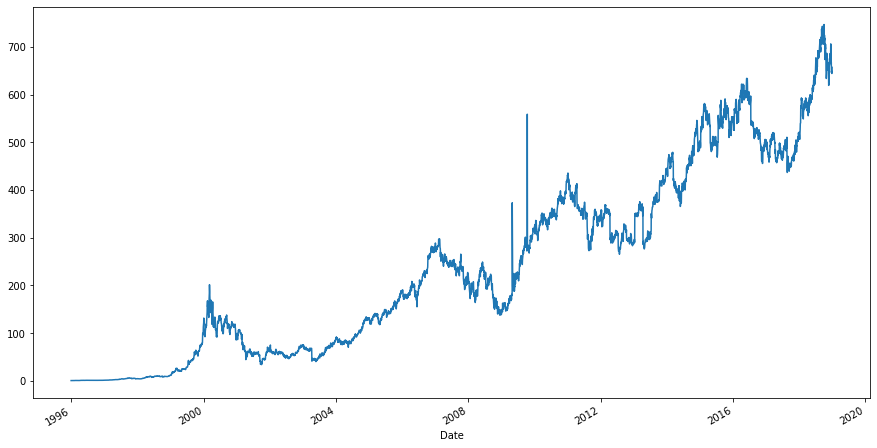

In [4]:
# Plot the adjusted close price
data['Close'].plot(figsize=(15, 8))
# Show the plot
plt.show()

In [5]:
data.to_csv('/content/drive/My Drive/AppliedAI/data.csv')

In [6]:
#check any null values present in data
data.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5681 entries, 1996-01-01 to 2018-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5681 non-null   float64
 1   High       5681 non-null   float64
 2   Low        5681 non-null   float64
 3   Close      5681 non-null   float64
 4   Adj Close  5681 non-null   float64
 5   Volume     5681 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 310.7 KB


In [8]:
data.rolling(window=7).mean().head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-08,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-09,0.791016,0.792244,0.787879,0.790861,-0.000438,299885.714286
1996-01-10,0.788923,0.789203,0.785087,0.787541,-0.000436,321828.571429
1996-01-11,0.786691,0.788087,0.782227,0.787193,-0.000436,409600.000000


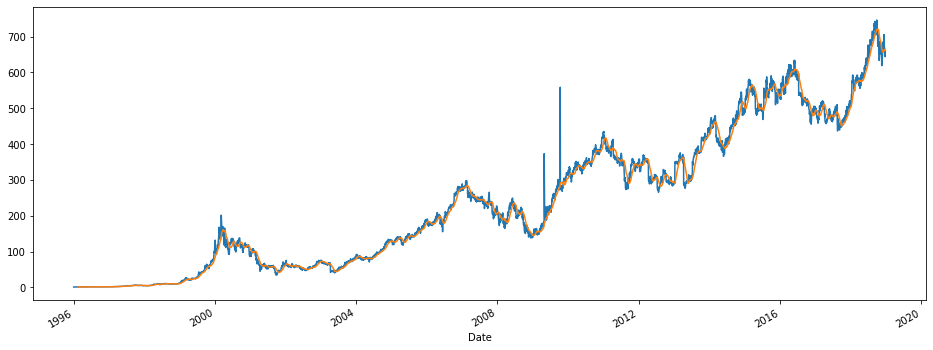

In [9]:
data['Close'].plot(figsize=(16,6))
data.rolling(window=30).mean()['Close'].plot()

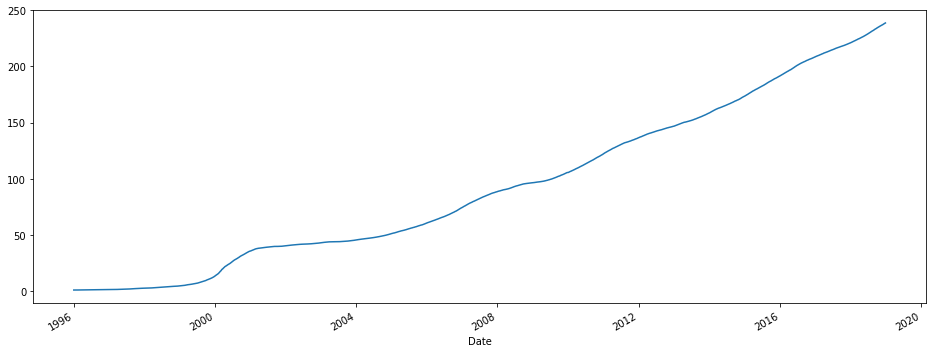

In [10]:
# Optional specify a minimum number of periods
data['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [11]:
import pandas as pd
import numpy as np
training_set=data['Close']
training_set=pd.DataFrame(training_set)
training_set

,Close
Date,
1996-01-01,0.796680
1996-01-02,0.793460
1996-01-03,0.798830
1996-01-04,0.793550
1996-01-05,0.784180
...,...
2018-12-21,646.200012
2018-12-24,649.000000
2018-12-26,644.049988


In [12]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[4.49129199e-05],
       [4.05959620e-05],
       [4.77953936e-05],
       ...,
       [8.62445574e-01],
       [8.79539320e-01],
       [8.79740455e-01]])

In [13]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 5620):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[4.49129199e-05, 4.05959620e-05, 4.77953936e-05, ...,
        2.14335418e-04, 2.23237596e-04, 2.49555281e-04],
       [4.05959620e-05, 4.77953936e-05, 4.07166278e-05, ...,
        2.23237596e-04, 2.49555281e-04, 2.93797906e-04],
       [4.77953936e-05, 4.07166278e-05, 2.81543618e-05, ...,
        2.49555281e-04, 2.93797906e-04, 2.99174006e-04],
       ...,
       [8.50312383e-01, 8.63451089e-01, 8.75249108e-01, ...,
        9.63935516e-01, 9.44562588e-01, 9.61924487e-01],
       [8.63451089e-01, 8.75249108e-01, 8.93683540e-01, ...,
        9.44562588e-01, 9.61924487e-01, 9.72582956e-01],
       [8.75249108e-01, 8.93683540e-01, 9.06453606e-01, ...,
        9.61924487e-01, 9.72582956e-01, 9.61388180e-01]])

In [14]:
y_train

array([2.93797906e-04, 2.99174006e-04, 2.88703253e-04, ...,
       9.72582956e-01, 9.61388180e-01, 9.70705963e-01])

In [15]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_train

In [16]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
# Initialising the RNN
regressor = Sequential()

In [18]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [19]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
174/174 [==============================] - 2s 14ms/step - loss: 0.0062
Epoch 2/100
174/174 [==============================] - 2s 13ms/step - loss: 0.0019
Epoch 3/100
174/174 [==============================] - 2s 13ms/step - loss: 0.0020
Epoch 4/100
174/174 [==============================] - 2s 13ms/step - loss: 0.0016
Epoch 5/100
174/174 [==============================] - 2s 13ms/step - loss: 0.0015
Epoch 6/100
174/174 [==============================] - 2s 13ms/step - loss: 0.0015
Epoch 7/100
174/174 [==============================] - 2s 13ms/step - loss: 0.0012
Epoch 8/100
174/174 [==============================] - 2s 13ms/step - loss: 0.0013
Epoch 9/100
174/174 [==============================] - 2s 13ms/step - loss: 0.0012
Epoch 10/100
174/174 [==============================] - 2s 13ms/step - loss: 0.0011
Epoch 11/100
174/174 [==============================] - 2s 13ms/step - loss: 0.0012
Epoch 12/100
174/174 [==============================] - 2s 14ms/step - loss: 0.0011
E

In [37]:
data_test = yf.download(tickers="INFY.NS", 
 start="2019-01-01",  end="2020-09-21") #year-mon-day
data_test

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,660.950012,666.299988,654.150024,665.049988,628.823120,2943390
2019-01-02,666.000000,674.000000,662.049988,669.049988,632.605225,7416655
2019-01-03,672.000000,677.000000,663.099976,669.150024,632.699768,6827249
2019-01-04,671.750000,673.900024,651.000000,661.049988,625.040955,7889310
2019-01-07,665.000000,673.599976,661.500000,671.700012,635.110840,8046340
...,...,...,...,...,...,...
2020-09-14,957.000000,991.049988,948.299988,978.400024,978.400024,21871587
2020-09-15,979.500000,994.000000,971.650024,982.450012,982.450012,11608203
2020-09-16,986.000000,1005.650024,982.000000,1001.750000,1001.750000,10059251


In [38]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 422 entries, 2019-01-01 to 2020-09-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       422 non-null    float64
 1   High       422 non-null    float64
 2   Low        422 non-null    float64
 3   Close      422 non-null    float64
 4   Adj Close  422 non-null    float64
 5   Volume     422 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.1 KB


In [39]:
real_stock_price = data_test.iloc[:, 3:4].values

In [40]:
test_set=data_test['Close']
test_set=pd.DataFrame(test_set)
test_set

,Close
Date,
2019-01-01,665.049988
2019-01-02,669.049988
2019-01-03,669.150024
2019-01-04,661.049988
2019-01-07,671.700012
...,...
2020-09-14,978.400024
2020-09-15,982.450012
2020-09-16,1001.750000


In [41]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 422 entries, 2019-01-01 to 2020-09-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   422 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


In [42]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((data['Close'], data_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - 60:].values

In [43]:
len(dataset_total)

6103

In [44]:
len(data)

5681

In [45]:
dataset_total

Date
1996-01-01       0.796680
1996-01-02       0.793460
1996-01-03       0.798830
1996-01-04       0.793550
1996-01-05       0.784180
                 ...     
2020-09-14     978.400024
2020-09-15     982.450012
2020-09-16    1001.750000
2020-09-17    1011.000000
2020-09-18    1002.150024
Name: Close, Length: 6103, dtype: float64

In [46]:
len(inputs)

482

In [47]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 482):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [48]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       422 non-null    float32
dtypes: float32(1)
memory usage: 1.8 KB


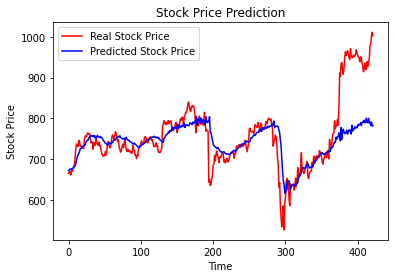

In [49]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [50]:
predicted_stock_price.columns=['predicted']
predicted_stock_price

,predicted
0,672.447754
1,673.177307
2,674.968567
3,676.139526
4,675.095398
...,...
417,791.717346
418,782.787964
419,790.879883
420,780.685913


In [51]:
real_stock_price=pd.DataFrame(real_stock_price)
real_stock_price.columns=['real']
real_stock_price

,real
0,665.049988
1,669.049988
2,669.150024
3,661.049988
4,671.700012
...,...
417,978.400024
418,982.450012
419,1001.750000
420,1011.000000


In [52]:
stock_prediction = pd.concat([real_stock_price, predicted_stock_price], axis=1)
stock_prediction

,real,predicted
0,665.049988,672.447754
1,669.049988,673.177307
2,669.150024,674.968567
3,661.049988,676.139526
4,671.700012,675.095398
...,...,...
417,978.400024,791.717346
418,982.450012,782.787964
419,1001.750000,790.879883
420,1011.000000,780.685913


In [53]:
stock_prediction.to_csv('/content/drive/My Drive/StockPrice_project/infosys_stock_prediction.csv')